# Whipping in Da 'Burgh
**Conor McGir, Drew Whiteside, Ryan Durstewitz**

### Directions for the Project

The datasets we are looking was to see which neighborhood in Pittsburgh is the best place to drive through. Each of us took on a different idea that we thought was important when looking at driving.

**Conor** - looked at the traffic counts of each neighborhood

**Ryan** - looked at the median speed of each neighborhood

**Drew** - looked at parking though parking meters and NO PARKING signs

*Why we picked this*
We felt that while yes there is public transit in the city, sometimes its more efficent to drive and not all of us want to be victim to the sometimes unreliable Port Authority Bus system.

### The Metric

Looking at our datasets we felt we would indivdually work on them and then come up with our score. Taking the scores from each neighborhood and then we would weigh them equally to find truly what the best neighborhood to drive through is.


### Traffic Counts of Every Neighborhood

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
dfT= pd.read_csv("6dfd4f8f-cbf5-4917-a5eb-fd07f4403167.csv")
dfT.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


### Where I was headed

Afte loading in the .csv file. It was pretty large so I needed a better picture of it so I could have more direction with what I wanted to do. I knew I wanted to focus on traffic in each neighborhood so I will have to pretty much ignore every other column outside of neighborhood and average_daily_car_traffic. Since this data set is from 2017 to 2021 and it would be quite noisy I decided I wanted to get the average in each neighborhood.

In [4]:
dfT.neighborhood.value_counts()

Squirrel Hill South    28
Bloomfield             21
Shadyside              18
Highland Park          16
East Liberty           16
                       ..
Allegheny Center        1
Upper Lawrenceville     1
Duquesne Heights        1
Regent Square           1
Crawford-Roberts        1
Name: neighborhood, Length: 74, dtype: int64

In [5]:
for col in dfT.columns:
    print(col)

id
device_id
record_oid
count_start_date
count_end_date
average_daily_car_traffic
average_daily_bike_traffic
counter_number
counter_type
speed_limit
max_speed
median_speed
percent_over_limit
speed85_percent
speed95_percent
longitude
latitude
neighborhood
council_district
ward
tract
public_works_division
pli_division
police_zone
fire_zone


<AxesSubplot:ylabel='Density'>

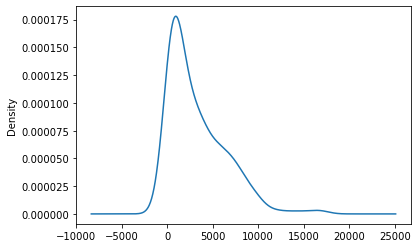

In [6]:
dfT['average_daily_car_traffic'].plot.density()

In [7]:
dfT['average_daily_car_traffic'].count()

286

In [8]:
dfT['neighborhood'].count()

418

In [9]:
dfT2 = dfT[['average_daily_car_traffic', 'neighborhood']]
dfT2.head()

,average_daily_car_traffic,neighborhood
0,4949.0,Polish Hill
1,NaN,Central Lawrenceville
2,NaN,Windgap
3,2741.0,Squirrel Hill South
4,NaN,Perry North


In [10]:
dfT3=dfT2[dfT2['average_daily_car_traffic'].notna()]
dfT3

,average_daily_car_traffic,neighborhood
0,4949.0,Polish Hill
3,2741.0,Squirrel Hill South
5,1046.0,Central Northside
7,3015.0,Polish Hill
10,5592.0,Squirrel Hill South
...,...,...
402,5605.0,Greenfield
404,809.0,Central Northside
410,910.0,Bloomfield
411,271.0,Bloomfield


### Final Destination

Now that I cleaned the data and the current data set I have is just the neighborhoods and the traffic data. I needed to group and get the mean so then I can sort and graph in an appealing way.

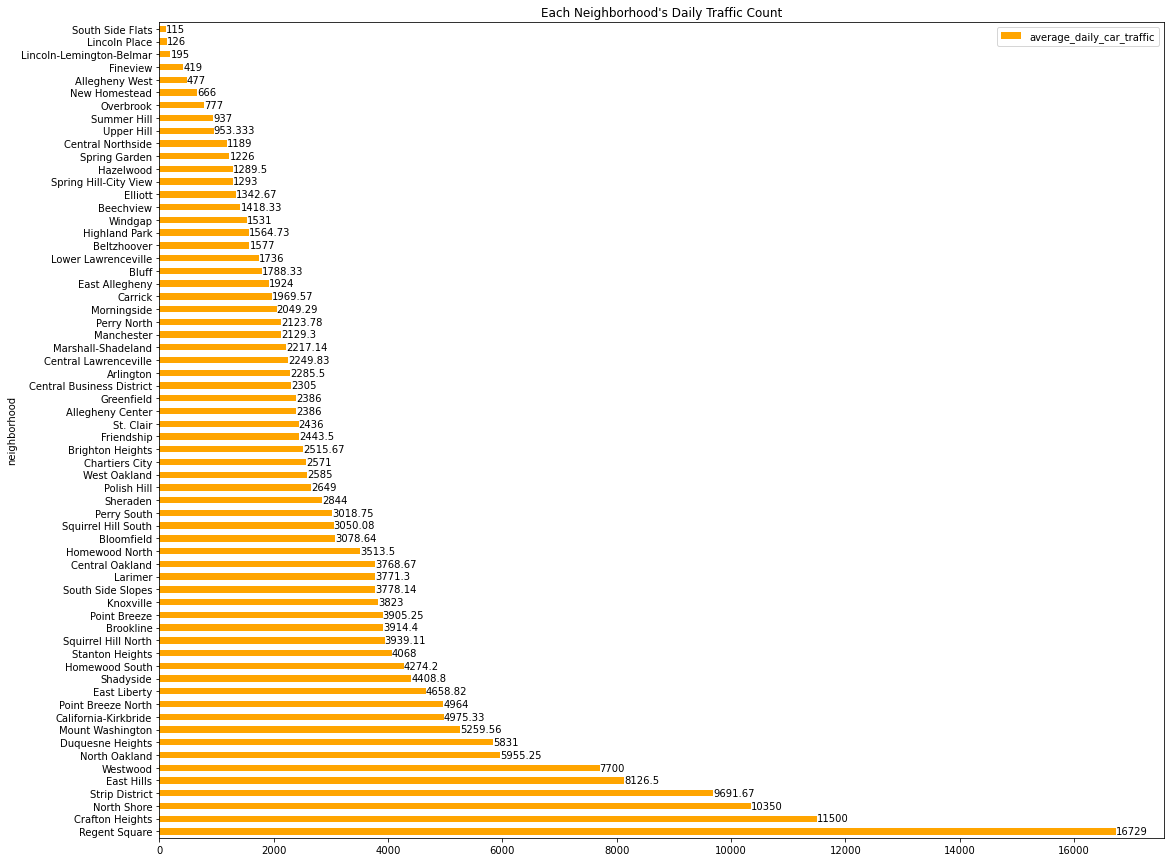

In [11]:
# Takes my dfT3 and sorts based on the traffic and groups it by the neighborhood then finds the mean 
best_hood=dfT3.sort_values(['average_daily_car_traffic','neighborhood'])\
                                   .groupby('neighborhood')\
                                   .mean()\
                                   .reset_index()


df_sorted=best_hood.sort_values('average_daily_car_traffic', ascending= False)
## graph is descending order of heaviest traffic to lightest traffic.

ax_sort = df_sorted.plot.barh(x='neighborhood', 
                         y='average_daily_car_traffic',
                        figsize=(18,15),
                       title= "Each Neighborhood's Daily Traffic Count",
                        color="orange")

#tick marks for graph
for container in ax_sort.containers:
    ax_sort.bar_label(container)

In [25]:
df_sorted['traffic_metric_value']=(1-df_sorted['average_daily_car_traffic']/16729)
df_sorted.iloc[54:]

,neighborhood,average_daily_car_traffic,traffic_metric_value
13,Central Northside,1189.000000,0.928926
60,Upper Hill,953.333333,0.943013
59,Summer Hill,937.000000,0.943989
41,Overbrook,777.000000,0.953554
38,New Homestead,666.000000,0.960189
1,Allegheny West,477.000000,0.971487
22,Fineview,419.000000,0.974954
32,Lincoln-Lemington-Belmar,195.000000,0.988344
31,Lincoln Place,126.000000,0.992468
50,South Side Flats,115.000000,0.993126


## Conclusion for Traffic Count

Based on the traffic count data. I think that *South Side Flats* would be the best (most accessible) neighborhood to have a car in. Compared to Regent Square where you would be getting a taste of New York City with the traffic you would be sitting it. If you live in Regent Square it might be best to get a bike or rely on Port Authority Bus.

### Median Speed of Every Neighborhood

### Parking Meters and NO PARKING Signs of Every Neighborhood

### Final Score

In [19]:
import pandas as pd

In [20]:
lst=  [
    ['South Side', .99, .99, .99, .99],
    ['place1', .90, .99, .99, .99],
    ['place2', .8, .99, .99, .99],
    ['place3', .7, .99, .99, .99],
    ['place', .6, .99, .99, .99],
]


df = pd.DataFrame(lst, columns=['neighborhood', 'traffic', 'speeding', 'meters', 'stopsigns'])

In [21]:
df['final_score'] = .25*(df.traffic) + .25*(df.speeding) + .25*(df.meters) + .25*(df.stopsigns)
df.sort_values('final_score')
df

,neighborhood,traffic,speeding,meters,stopsigns,final_score
0,South Side,0.99,0.99,0.99,0.99,0.9900
1,place1,0.90,0.99,0.99,0.99,0.9675
2,place2,0.80,0.99,0.99,0.99,0.9425
3,place3,0.70,0.99,0.99,0.99,0.9175
4,place,0.60,0.99,0.99,0.99,0.8925


### Conclusions